In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import sys
sys.path.insert(0, '../src')

In [44]:
! pip install -i https://test.pypi.org/simple/ my-krml_14229898==0.2.5

Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for my-krml_14229898==0.2.5 from https://test-files.pythonhosted.org/packages/cc/f5/1e01a6a7a72500b1c65e0a890f369ff28109484394ab870d30582c0bdd31/my_krml_14229898-0.2.5-py3-none-any.whl.metadata
  Attempting uninstall: my-krml_14229898
    Found existing installation: my-krml-14229898 0.2.4
    Uninstalling my-krml-14229898-0.2.4:
      Successfully uninstalled my-krml-14229898-0.2.4


# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 2 - Predicting Customer Churn in the Telecomunication Provider

### 3. Modeling

#### 3.1 Logistic Regression Model

**[3.1]** Import the pandas and numpy packages

In [45]:
import pandas as pd
import numpy as np

**[3.2]** Import the `load_sets` from my custom package

#### 1. Load the datset

In [46]:
from my_krml_14229898.data.sets import load_sets_smote, load_sets

**[3.3]** Load the SMOTE saved sets from `data/processed`

In [47]:
X_train_resampled, y_train_resampled = load_sets_smote(path='../data/processed/')

**[3.4]** Load the `validating` and `testing` sets from `data/processed`

In [48]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets('../data/processed/')

#### 2. Train Logistic Regression Model

**[3.5]** Import the Logistic Regression package

In [49]:
from sklearn.linear_model import LogisticRegression

**[3.6]** Instantiate a `LogisticRegression` class

In [50]:
log_reg = LogisticRegression(random_state=8)

**[3.7]** Import `fit_asses_classifier` function from the customer package

In [51]:
from my_krml_14229898.models.performance import fit_assess_classifier

**[3.8]** Set the performance metrics to be used for the model.

In [52]:
metrics = ['precision', 'recall', 'f1', 'roc_auc']

**[3.9]** Fit the model and display the performance on training and validation sets.

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                f1  precision    recall   roc_auc
Training  0.847204   0.851912  0.842548  0.848044
                  f1  precision    recall   roc_auc
Validation  0.618742   0.621134  0.616368  0.735842


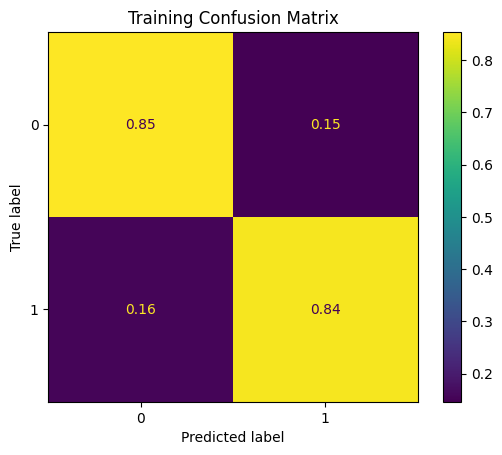

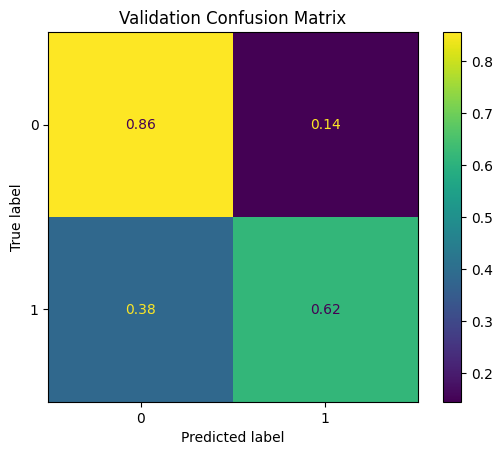

In [54]:
log_reg = fit_assess_classifier(log_reg, X_train_resampled, y_train_resampled, X_val, y_val, metrics=metrics)

**[4.0]** Import `dump` from `joblib` and save the fitted model into the folder `models` as a file called `logistic-regression.joblib`

In [56]:
from joblib import dump

dump(log_reg, '../models/logistic-regression.joblib')

['../models/logistic-regression.joblib']

#### 3. Hyperparameter tuning with Hyperopt

**[4.1]** Import Trials, STATUS_OK, tpe, hp, fmin from hyperopt package

In [60]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
rstate = np.random.default_rng(42)

**[4.2]** Define the search space for logistic regression hyperparameters


In [88]:
space = {
    'C': hp.loguniform('C', -5, 2),
    'penalty': hp.choice('penalty', ['l2', None]),
    'max_iter': hp.quniform('max_iter', 100, 5000, 1),
    'solver': hp.choice('solver', ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']),
    'fit_intercept': hp.choice('fit_intercept', [True, False])
}

In [89]:
def objective(space):
    from sklearn.model_selection import cross_val_score
    
    log_reg = LogisticRegression(
        C=float(space['C']),
        penalty=space['penalty'],
        max_iter=int(space['max_iter']),
        solver=space['solver'],
        fit_intercept=space['fit_intercept'],
    )
    
    acc = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall').mean()
    
    return {'loss': -acc,'status': STATUS_OK}

In [90]:
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    rstate=rstate,
)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 20%|██        | 2/10 [00:07<00:25,  3.24s/trial, best loss: -0.8008312812710761]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 30%|███       | 3/10 [00:14<00:34,  4.97s/trial, best loss: -0.8008312812710761]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 70%|███████   | 7/10 [00:21<00:06,  2.17s/trial, best loss: -0.8198984686648785]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 80%|████████  | 8/10 [00:30<00:08,  4.11s/trial, best loss: -0.8198984686648785]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converg

 90%|█████████ | 9/10 [00:35<00:04,  4.39s/trial, best loss: -0.8198984686648785]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


100%|██████████| 10/10 [00:43<00:00,  4.40s/trial, best loss: -0.8198984686648785]


In [91]:
print("Best parameters: ", best)

Best parameters:  {'C': 0.44939914927869445, 'fit_intercept': 1, 'max_iter': 4461.0, 'penalty': 0, 'solver': 1}


In [98]:
log_reg2 = LogisticRegression(
    C=best['C'],
    penalty='l2',
    max_iter=4461,
    solver='newton-cg',
    fit_intercept=best['fit_intercept']
)

In [100]:
best

{'C': 0.44939914927869445,
 'fit_intercept': 1,
 'max_iter': 4461.0,
 'penalty': 0,
 'solver': 1}

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


               f1  precision    recall   roc_auc
Training  0.84659   0.848377  0.844811  0.846912
                  f1  precision    recall   roc_auc
Validation  0.624365   0.619647  0.629156  0.740267


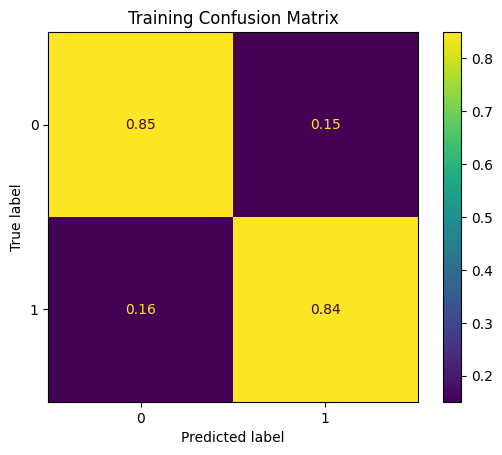

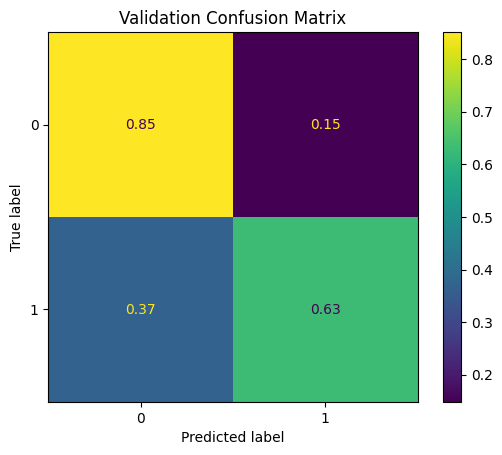

In [99]:
log_reg2 = fit_assess_classifier(log_reg2, X_train_resampled, y_train_resampled, X_val, y_val, metrics=metrics)